너무 하기 싫어서 대충 마무리하고 냈던 2차과제

하지만 비젼쪽 중요하므로, 앞으로 디벨롭해서 완성해야 할 필요성을 느껴

일단 깃에 올린다.

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
print(cv2.__version__)

3.4.2


SIFT를 지원하는 버전으로 cv2 버전을 맞추어 사용했습니다.

# P1 : Feature Descriptor and Feature Matching (40 pts)

1-1. 임의의 이미지에서 그리드 형식으로 작은 이미지(패치)를 생성하는 함수를 구현하시오.

# 이따구로 라이브러리 쓰면 안된다.

https://www.programcreek.com/python/?CodeExample=extract+patches  
  
패치 추출 알고리즘을 모아놓은 사이트다.  

참고 후 문제 요건에 맞게 수정해보자  

In [40]:
from sklearn.feature_extraction import image

def make_patches(img, x, y):
    patches = image.extract_patches_2d(img, (x,y))
    return patches

In [49]:
img_GRAY = cv2.imread('C:/Users/qhrrl/CodeExamples/CV2021-1-Assignment_02_source/paired_images/annapurna_left.png', 0)

rows, cols = img_GRAY.shape

patches = make_patches(img_GRAY, 100, 100)
patch_size, patch_x, patch_y = patches.shape
print(patch_size, patch_x, patch_y)

206088 100 100


1-2. 주어진 패치에서 1) image gradient, 2) color histogram 디스크립터를 추출하는 함수를 각각 구
현하시오.

In [50]:
def extract_gradient(patch, samples):
    patch_pixel_value = []
    patch_gradient = []
    for n in range(0, samples):
        pixel_value = []
        gradient = []
        patch_rows, patch_cols = patch[n].shape
        for i in range(0, patch_rows):
            for j in range(0, patch_cols):
                pixel_value.append(patch[n][i, j])
        for k in range(0, len(pixel_value) - 1):
            if pixel_value[k] > pixel_value[k + 1]:
                gradient.append('-')
            elif pixel_value[k] < pixel_value[k + 1]:
                gradient.append('+')
            else:
                gradient.append('0')
        patch_pixel_value.append(pixel_value)
        patch_gradient.append(gradient)
    return patch_pixel_value, patch_gradient

In [51]:
pixel_value, pixel_gradient = extract_gradient(patches, 5)
for i in range(0, len(pixel_gradient)):
    print(np.array(pixel_gradient[i]).T)

['-' '-' '-' ... '+' '0' '0']
['-' '-' '0' ... '0' '0' '0']
['-' '0' '-' ... '0' '0' '+']
['0' '-' '0' ... '0' '+' '-']
['-' '0' '+' ... '+' '-' '0']


In [52]:
def extract_color_histogram(patch, n):
    hists = cv2.calcHist([patch[n]], [0], None, [256], [0, 256])
    return hists

(<AxesSubplot:title={'center':'patch_hist'}>,
 Text(0.5, 1.0, 'patch_hist'))

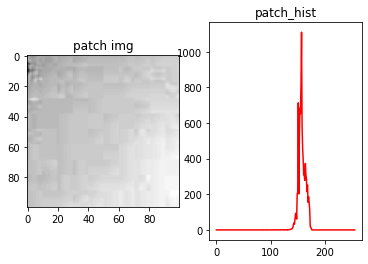

In [53]:
plt.subplot(121) , plt.imshow(patches[0], cmap = 'gray'), plt.title('patch img')
plt.subplot(122) , plt.plot(extract_color_histogram(patches, 0), color = 'r'), plt.title('patch_hist')

1-3.   
앞서 구한 1) image patch, 2) image gradient, 3) color histogram 디스크립터 특징을 이용하여,  
“paired images” 폴더에 있는 이미지들로 feature matching을 해보시오.  
이 때, opencv의 builtin함수(Brute Force Matcher와 같은)를 사용하시면 됩니다.  
또한, cv2.drawMatches(…)를 이용하여 결과를 나타내어 보시오  

In [ ]:
def custom_descriptor():
    return 

matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

img_left = cv2.imread('C:/Users/qhrrl/CodeExamples/CV2021-1-Assignment_02_source/paired_images/annapurna_left.png', cv2.IMREAD_GRAYSCALE)
img_right = cv2.imread('C:/Users/qhrrl/CodeExamples/CV2021-1-Assignment_02_source/paired_images/annapurna_right.png', cv2.IMREAD_GRAYSCALE)
""" TODO : """
detector = custom_descripter()

kp1, desc1 = detector.detectAndCompute(img_left, None)
kp2, desc2 = detector.detectAndCompute(img_right, None)

matches = matcher.match(desc1, desc2)

comparison = cv2.drawMatches(img_left,
                             kp1,
                             img_right,
                             kp2,
                             matches,
                             None,
                             flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20,5))
plt.imshow(comparison)

1-4.  
OpenCV의 함수를 사용해 SIFT와 같은 더 나은 디스크립터를 추출해 feature matching을 수
행하고 결과를 그려보시오.   
앞서 직접 구현한 3가지 디스크립터와 결과를 비교해보시오

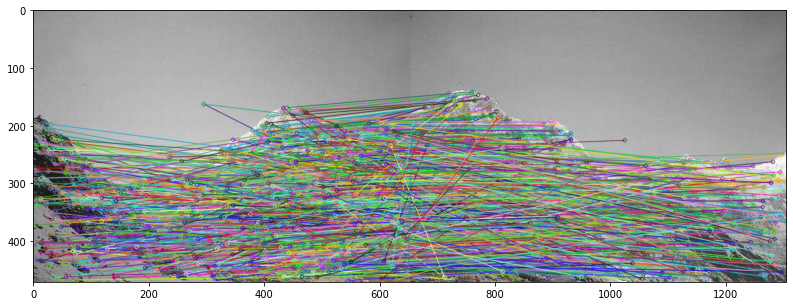

In [55]:
matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

img_left = cv2.imread('C:/Users/qhrrl/CodeExamples/CV2021-1-Assignment_02_source/paired_images/annapurna_left.png', cv2.IMREAD_GRAYSCALE)
img_right = cv2.imread('C:/Users/qhrrl/CodeExamples/CV2021-1-Assignment_02_source/paired_images/annapurna_right.png', cv2.IMREAD_GRAYSCALE)

detector = cv2.xfeatures2d.SIFT_create()

kp1, desc1 = detector.detectAndCompute(img_left, None)
kp2, desc2 = detector.detectAndCompute(img_right, None)

matches = matcher.match(desc1, desc2)

comparison = cv2.drawMatches(img_left,
                             kp1,
                             img_right,
                             kp2,
                             matches,
                             None,
                             flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20,5))
plt.imshow(comparison)

# [문제 2. Homography and Stitching (30 pts)] 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
print(cv2.__version__)

3.4.2


2-1. Homography 행렬 H를 1-4에서 feature matching을 통해 얻어진 매칭 포인트들을 이용해 구해보시오.  
  
이 때, cv2.findHomography 함수를 이용하고 method 값은 0(SVD 혹은 least- square 방식의 일반적 해법)으로 두어 모든 포인트들을 사용 하시오.

2-2,  
2-1의 matches를 이용하여, RANSAC option으로 H를 구해보세요.

동일하게 시프트 디스크립터를 사용하였습니다.

In [19]:
# Problem 2-1
# 1) 1-4의 매칭 포인트들을 이용하여, cv2.findHomography를 사용해, Homography 행렬을 SVD 방식으로 구해보세요.

# 먼저, 임의의 paired 이미지를 읽습니다.
imgL = cv2.imread('C:/Users/qhrrl/CodeExamples/CV2021-1-Assignment_02_source/paired_images/scottsdale_left.png')
imgR = cv2.imread('C:/Users/qhrrl/CodeExamples/CV2021-1-Assignment_02_source/paired_images/scottsdale_right.png')
hl, wl = imgL.shape[:2]
hr, wr = imgR.shape[:2]

# cv2 함수에서 SIFT와 같은 디스크립터를 정의하세요.
descriptor = cv2.xfeatures2d.SIFT_create()

# 두 이미지에 대하여, Keypoint와 특징을 추출하세요.
kp1, desc1 = descriptor.detectAndCompute(imgL, None)
kp2, desc2 = descriptor.detectAndCompute(imgR, None)

# 위 포인트들에 대하여 1-3~4와 유사하게 매칭을 수행합니다.
matcher = cv2.BFMatcher()
matches = matcher.knnMatch(desc2, desc1, 2)

good_matches = []
ratio = 0.75
for m in matches:
    if len(m) == 2 and m[0].distance < m[1].distance * ratio:
        good_matches.append(( m[0].trainIdx, m[0].queryIdx))

if len(good_matches) > 4:
    ptsL = np.float32([kpsL[i].pt for (i, _) in good_matches])
    ptsR = np.float32([kpsR[i].pt for (_, i) in good_matches])
    H, ok = cv2.findHomography(ptsR,ptsL, 0)
    # Problem 2-2
    # 2-1의 matches를 이용하여, RANSAC option으로 H를 구해보세요.
    RAN_H, RAN_ok = cv2.findHomography(ptsR,ptsL, cv2.RANSAC, 4.0)

(<AxesSubplot:title={'center':'RANSAC_H'}>,
 Text(0.5, 1.0, 'RANSAC_H'))

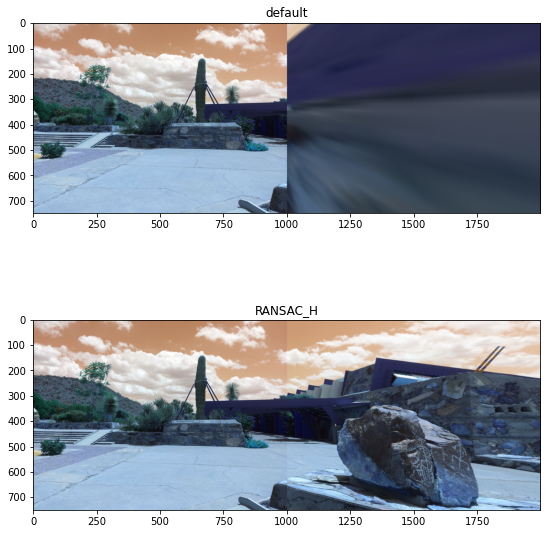

In [20]:
# Problem 2-3
# cv2.warpPersective 함수를 이용하여 2-1)과 2-2)의 결과를 나타내어 비교해보세요.plt.figure(figsize=(20,10))

plt.figure(figsize=(20,10))

panorama = cv2.warpPerspective(imgR, H, (wr + wl, hr))
panorama[0:hl, 0:wl] = imgL
plt.subplot(221), plt.imshow(panorama), plt.title('default')


panorama2 = cv2.warpPerspective(imgR, RAN_H, (wr + wl, hr))
panorama2[0:hl, 0:wl] = imgL
plt.subplot(223), plt.imshow(panorama2),plt.title('RANSAC_H')

# [문제 3. Homography with RANSAC 직접 구현 (30 pts)] 

3-1. RANSAC 알고리즘을 통한 Homography 행렬 H를 구하는 함수를 직접 구현해 구해보시오.  
이 때, cv2.findHomography와 같이 H를 직접적으로 구해주는 Library를 사용하지 마세요.   
다만, Numpy와 같이 중간 결과를 편하게 계산해주는 Library 사용은 가능합니다. 

In [ ]:
이 부분은 제출기한까지 시간이 부족해 완성하지 못했음을 밝힙니다.



3-2. 앞서 3-1에서 구한 두 가지의 Homography 행렬을 이용해,  
“paired images” 폴더에 있는 이미지들로 image stitching을 해보시오.  
이 때, 2-3과 동일하게, cv2.warpPerspective(…) 함수를 사용하시오.  
또한, 해당 결과를 2-2 결과와 비교해 구현이 올바른지 검증해보시오.  